In [1]:
%load_ext autoreload
%autoreload 1


In [1]:
from setup_cc import *
from sklearn.preprocessing import StandardScaler
from hembedder.utils.hyperparameter_tuning_legacy import grid_search, random_search
from hembedder.utils import hyperparameter_tuning
from hembedder.utils import quality_metrics
import umap


ascending = [False]*14

evaluate_n_n_default = quality_metrics.CDEmbeddingPerformance(dcor_level=2, n_neighbours=15, metric='manhattan')
evaluate = quality_metrics.CDEmbeddingPerformance(dcor_level=1,metric='manhattan')
from sklearn.preprocessing import StandardScaler

evaluators = {'Random_triplets' : evaluate.random_triplet_eval,
            'dcor_1': evaluate._return_distance_correlation,
            'neighbor_kept_50' : evaluate.neighbor_kept_ratio_eval,
            'neighbor_kept' : evaluate_n_n_default.neighbor_kept_ratio_eval,
            'dcor_2': evaluate_n_n_default._return_distance_correlation,
            'Trustworthiness': evaluate._return_trustworthiness,
            'LCMC_Q_matrix': evaluate._return_LCMC,
            'Trustworthiness_Q_matrix': evaluate._return_Qtrustworthiness,
            'Continuit_Q_matrix':  evaluate._return_Qcontinuity,
            'nMRRE_Q_matrix' : evaluate._return_nMRRE,
            'vMRRE_Q_matrix' : evaluate._return_vMRRE,
            'Qnx_crm_Q_matrix': evaluate._return_qnx_crm,
            'Rnx_crm_Q_matrix': evaluate._return_rnx_crm,
            'Qnx_auc_crm_Q_matrix': evaluate._return_rnx_auc_crm}

sizes = [5000,10000,20000,40000,60000,80000,160000]
metric_chuck_size = 1000
default_sample_size = 40000
default_component = 8
default_scaler = StandardScaler()
umap_extra_args = {'metric':'manhattan',
                   'output_metric': 'manhattan',
                   'n_jobs':4,
                   'n_epochs':500,
                   'init': 'spectral',
                   'dens_lambda': 0.1,
                   'dens_frac': 0.1,
                   'repulsion_strength': 1.1,
                   'negative_sample_rate':10,
                   'random_state': 42,
                   'min_dist':0.0}


## Individually tuning the parameters for nearest neighbours for different sample size

In [2]:
#n_n 5
evaluate_n_n_default.n_neighbours = 5
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
evaluate_n_n_default.n_neighbours = 5                   
param_grid = {'n_neighbors': [5]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std_Q.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component, **umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std_Q.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


  0%|          | 0/6 [00:00<?, ?it/s]


TypeError: UMAP.__init__() got an unexpected keyword argument 'standardised'

In [3]:
#n_n 15
evaluate_n_n_default.n_neighbours = 15
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [15]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std_Q.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std_Q.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample  size is larger than data size which is 3093792


7it [8:51:40, 4557.21s/it]                         

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets        0.742932
dcor_1                 0.849537
neighbor_kept_ratio    0.131937
neighbor_kept_15       0.131937
dcor_2                 0.690606
Trustworthiness        0.944401
Name: 0, dtype: object
with parameter: {'n_neighbors': 15, 'n_components': 6, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  531.67 minutes.


In [5]:
#n_n 30
evaluate_n_n_default.n_neighbours = 30
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [30]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_30_std_Q.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_30_std_Q.csv")

Total number of embedding runs :  1 (combos)x10(iterations) with [160000] sample_size for the embedding. Exceptions will be raised, if sample  size is larger than data size which is 3093792


1it [4:40:41, 16841.42s/it]

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets        0.741036
dcor_1                 0.847248
neighbor_kept_ratio      0.1663
neighbor_kept_15       0.131939
dcor_2                 0.685758
Trustworthiness         0.93666
Name: 0, dtype: object
with parameter: {'n_neighbors': 30, 'n_components': 6, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  280.69 minutes.


In [6]:
#n_n 50
evaluate_n_n_default.n_neighbours = 50
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_50_std_Q.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_50_std_Q.csv")

Total number of embedding runs :  1 (combos)x10(iterations) with [160000] sample_size for the embedding. Exceptions will be raised, if sample  size is larger than data size which is 3093792


1it [5:26:25, 19585.96s/it]

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets         0.74154
dcor_1                 0.848905
neighbor_kept_ratio    0.196974
neighbor_kept_15       0.130476
dcor_2                 0.685881
Trustworthiness        0.929228
Name: 0, dtype: object
with parameter: {'n_neighbors': 50, 'n_components': 6, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  326.43 minutes.


In [7]:
#n_n 100
evaluate_n_n_default.n_neighbours = 100
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [100]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_100_std_Q.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_100_std_Q.csv")

Total number of embedding runs :  1 (combos)x10(iterations) with [160000] sample_size for the embedding. Exceptions will be raised, if sample  size is larger than data size which is 3093792


1it [6:40:12, 24012.47s/it]

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets        0.740172
dcor_1                 0.853132
neighbor_kept_ratio    0.249699
neighbor_kept_15       0.131577
dcor_2                  0.68755
Trustworthiness        0.918486
Name: 0, dtype: object
with parameter: {'n_neighbors': 100, 'n_components': 6, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  400.21 minutes.


## UMAP component tuning and comparing different scalers

In [2]:
#standard scaler
from sklearn.preprocessing import StandardScaler

param_grid = {'n_components': [2,4,6,8,10,20,30],
              'n_neighbors': [15,50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale.csv",
                        sample_size=default_sample_size,metric_chuck_size=metric_chuck_size,scaler=StandardScaler(), num_iter=10, dtype=np.float32,
                        n_parjobs=10, **umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale.csv")

Total number of embedding runs :  14 (combos)x10(iterations) with [40000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


14it [16:07:23, 4145.98s/it]                          

Hyperpameter tuning is done and the best scores with 40000 sample size are
Random_triplets              0.74614
dcor_1                      0.851287
neighbor_kept_50             0.31734
neighbor_kept               0.213467
dcor_2                      0.679738
Trustworthiness             0.890102
LCMC_Q_matrix               0.317658
Trustworthiness_Q_matrix    0.879814
Continuit_Q_matrix          0.833172
nMRRE_Q_matrix              0.110804
vMRRE_Q_matrix              0.153579
Qnx_crm_Q_matrix            0.317658
Rnx_crm_Q_matrix            0.281669
Qnx_auc_crm_Q_matrix        0.256358
Name: 0, dtype: object
with parameter: {'n_components': 30, 'n_neighbors': 15, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  967.4 minutes.


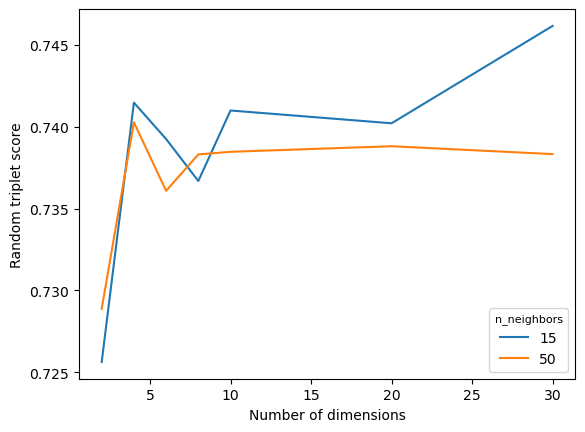

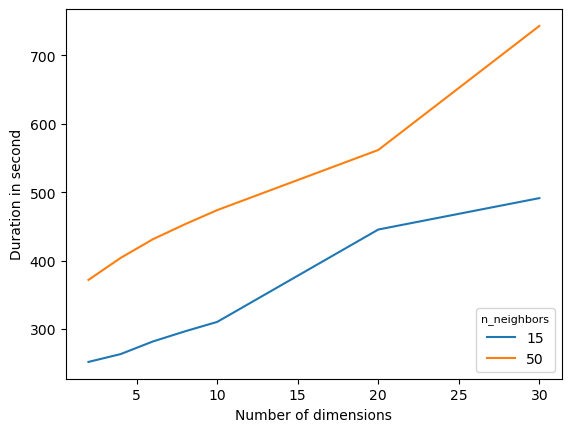

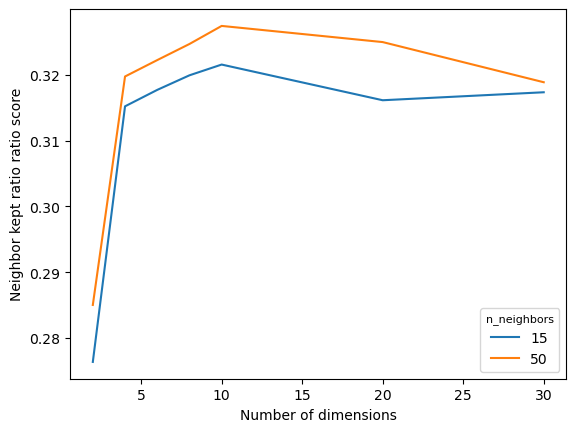

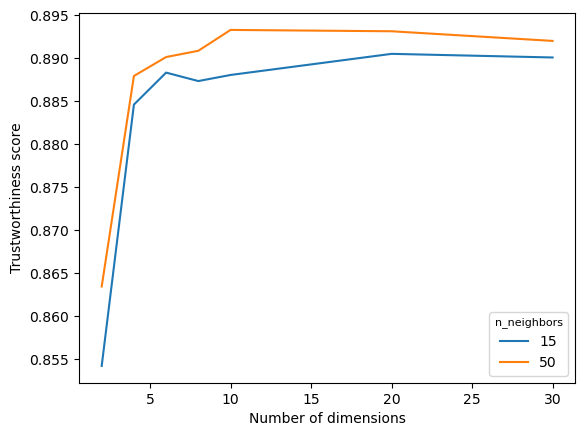

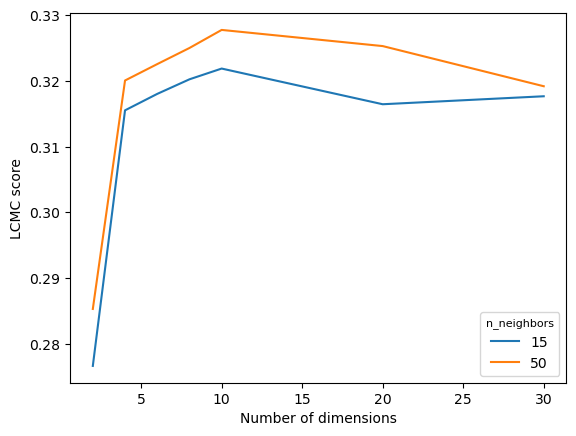

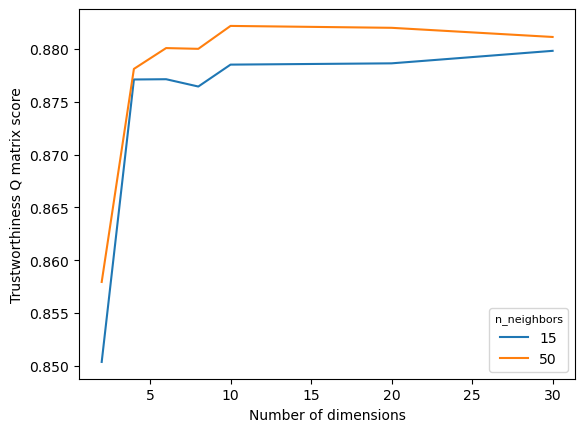

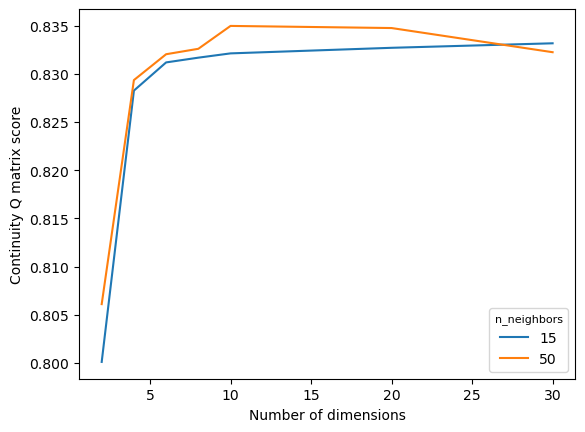

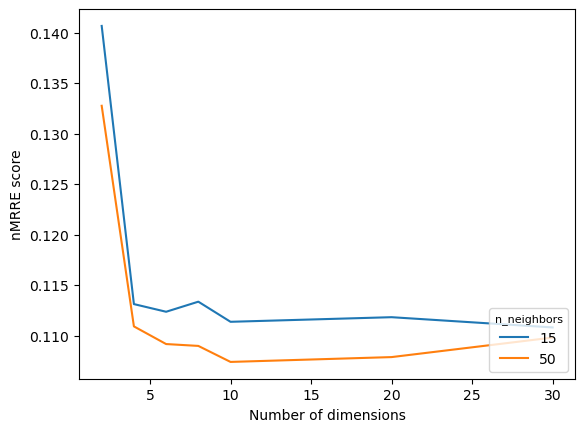

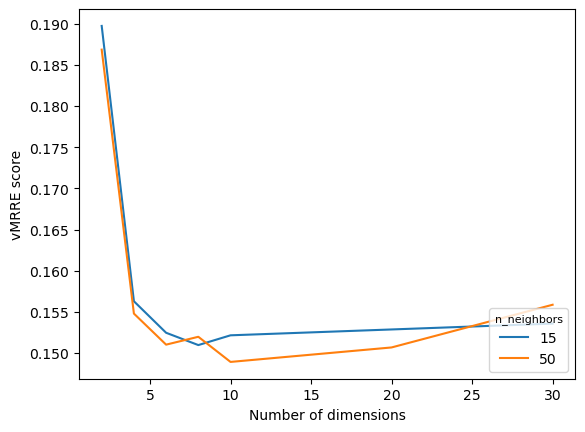

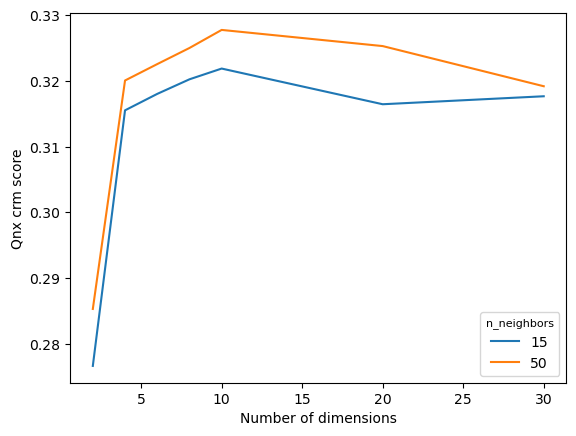

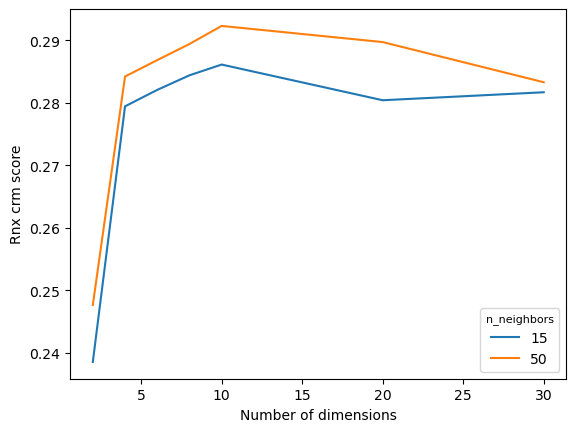

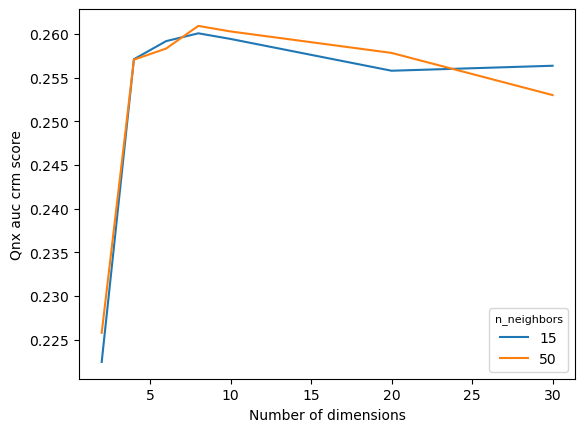

In [5]:
umap_std_data= pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale.csv")

performance_plot_same_file(umap_std_data,x="n_components",y="Random_triplets", hue="n_neighbors",x_title="Number of dimensions",y_title="Random triplet score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="duration_in_second", hue="n_neighbors",x_title="Number of dimensions",y_title="Duration in second",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="neighbor_kept_50", hue="n_neighbors",x_title="Number of dimensions",y_title="Neighbor kept ratio ratio score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Trustworthiness", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="LCMC_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="LCMC score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Trustworthiness_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Continuit_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Continuity Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="nMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="nMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="vMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="vMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Qnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Rnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Rnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Qnx_auc_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx auc crm score",legend_title="n_neighbors")


In [3]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution = 'normal')
param_grid = {'n_components': [2,4,6,8,10,20,30],
              'n_neighbors': [15,50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale.csv",
                        sample_size=default_sample_size,metric_chuck_size=metric_chuck_size,scaler=scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale.csv")

Total number of embedding runs :  14 (combos)x10(iterations) with [40000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


14it [15:43:09, 4042.10s/it]                          

Hyperpameter tuning is done and the best scores with 40000 sample size are
Random_triplets              0.73624
dcor_1                      0.841956
neighbor_kept_50            0.297044
neighbor_kept               0.195693
dcor_2                      0.662401
Trustworthiness             0.869755
LCMC_Q_matrix               0.297341
Trustworthiness_Q_matrix    0.869399
Continuit_Q_matrix          0.814611
nMRRE_Q_matrix              0.123314
vMRRE_Q_matrix              0.169875
Qnx_crm_Q_matrix            0.297341
Rnx_crm_Q_matrix            0.260281
Qnx_auc_crm_Q_matrix        0.235961
Name: 0, dtype: object
with parameter: {'n_components': 30, 'n_neighbors': 50, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  943.16 minutes.


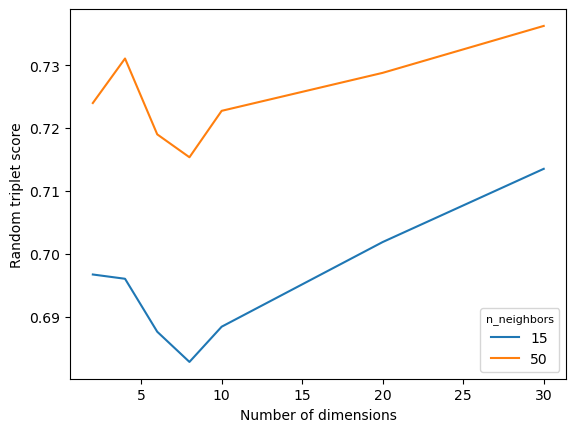

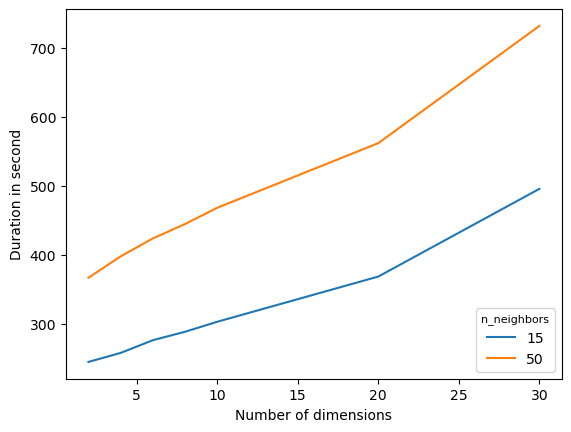

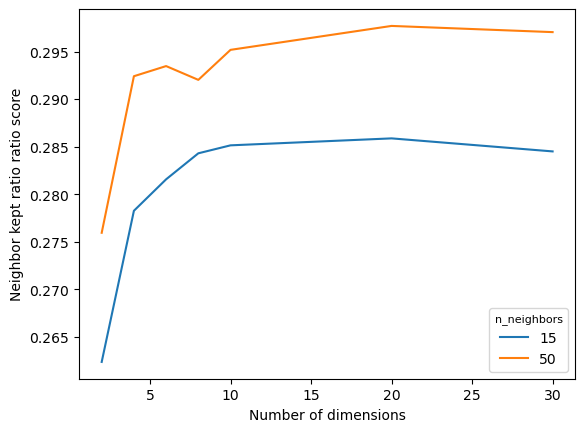

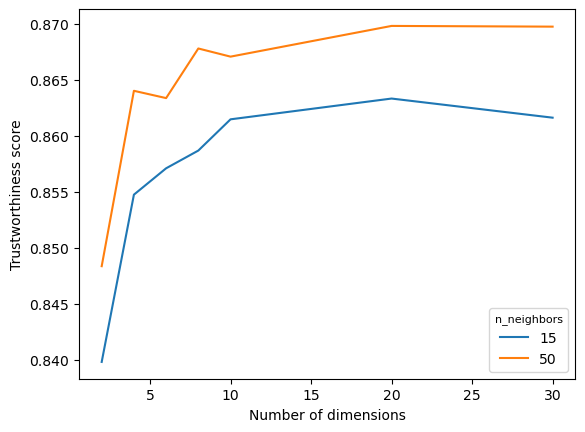

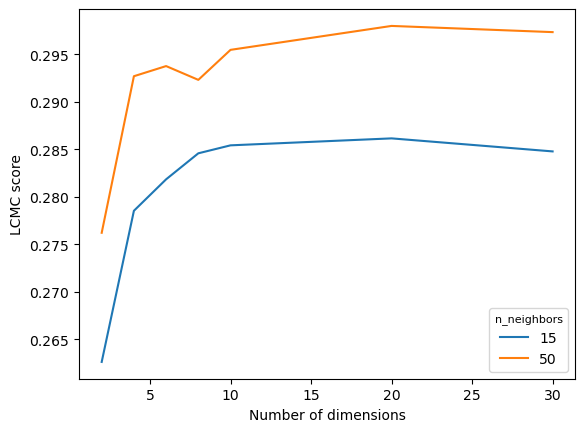

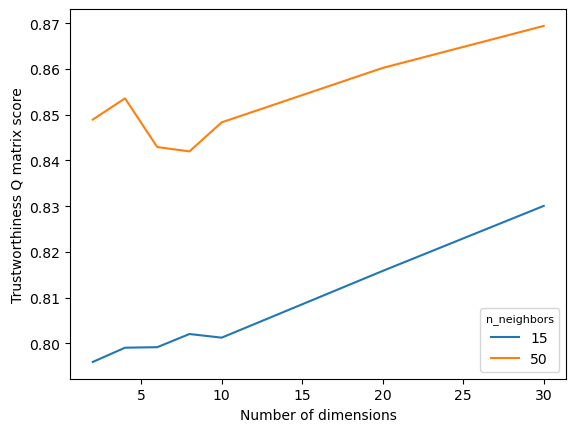

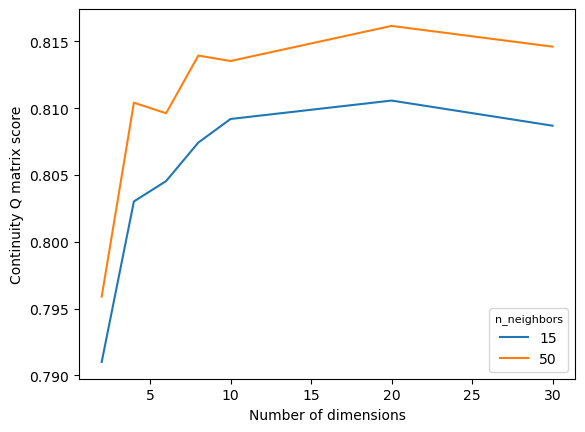

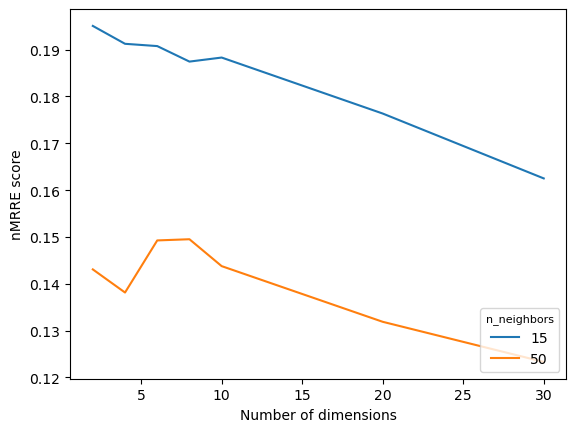

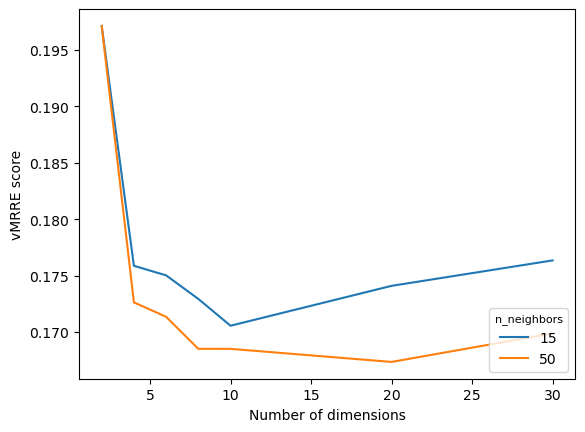

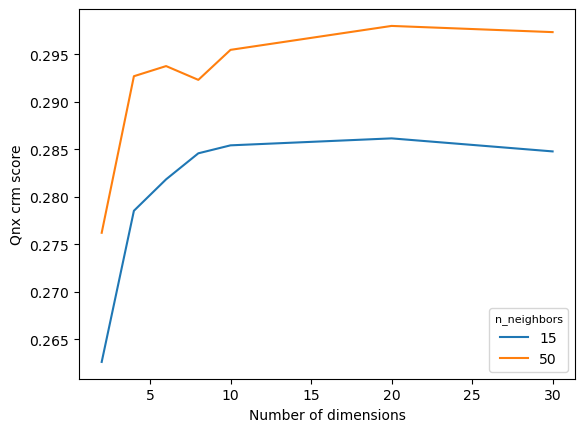

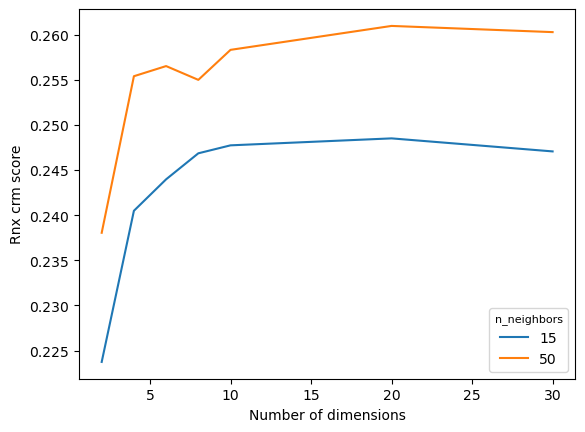

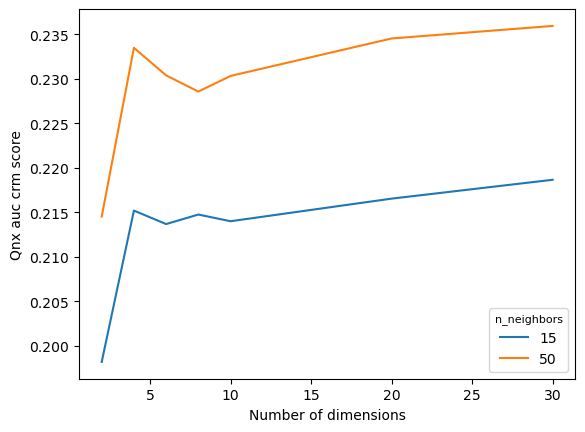

In [6]:
umap_quan_data= pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale.csv")

performance_plot_same_file(umap_quan_data,x="n_components",y="Random_triplets", hue="n_neighbors",x_title="Number of dimensions",y_title="Random triplet score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="duration_in_second", hue="n_neighbors",x_title="Number of dimensions",y_title="Duration in second",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="neighbor_kept_50", hue="n_neighbors",x_title="Number of dimensions",y_title="Neighbor kept ratio ratio score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Trustworthiness", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="LCMC_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="LCMC score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Trustworthiness_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Continuit_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Continuity Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="nMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="nMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="vMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="vMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Qnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Rnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Rnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Qnx_auc_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx auc crm score",legend_title="n_neighbors")


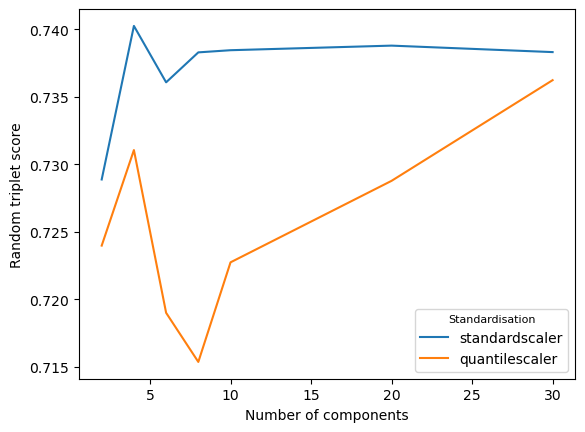

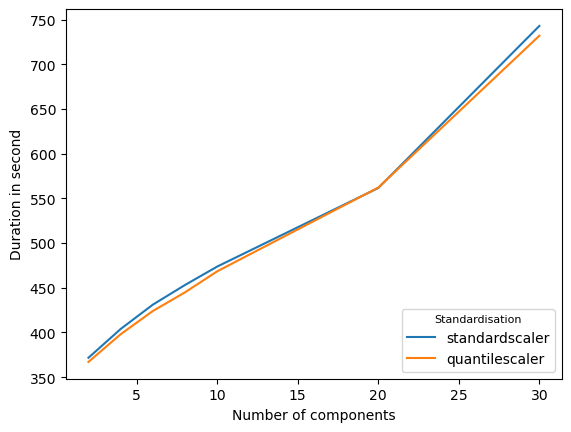

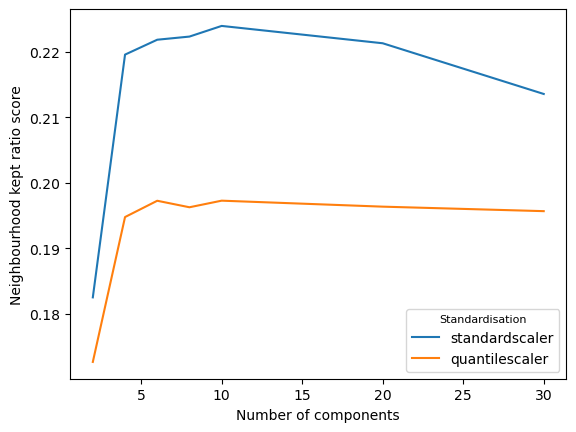

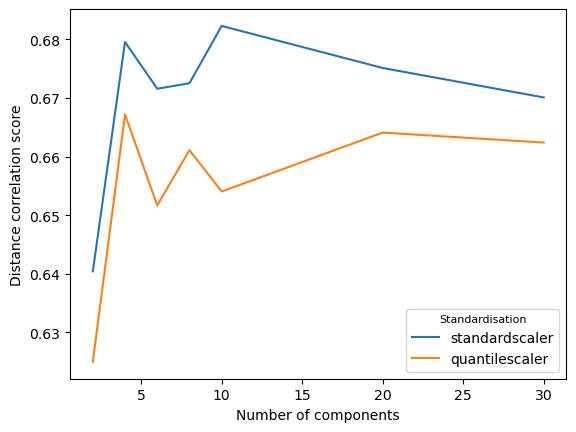

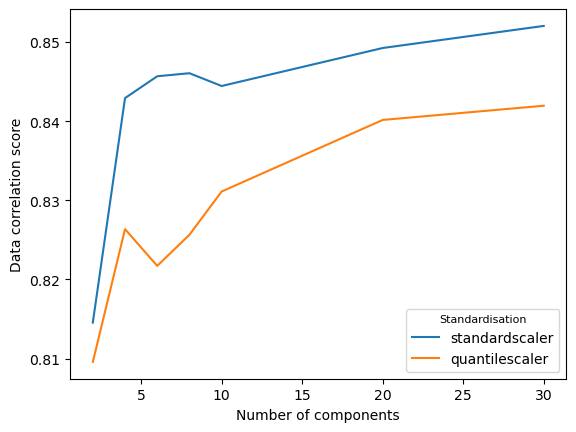

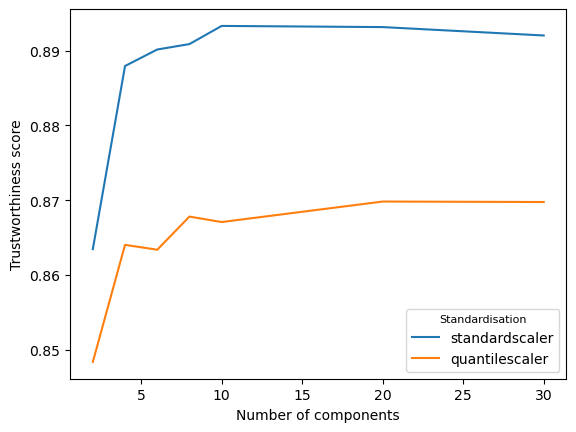

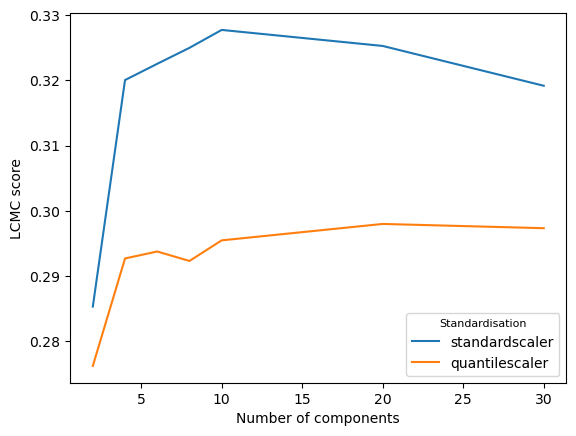

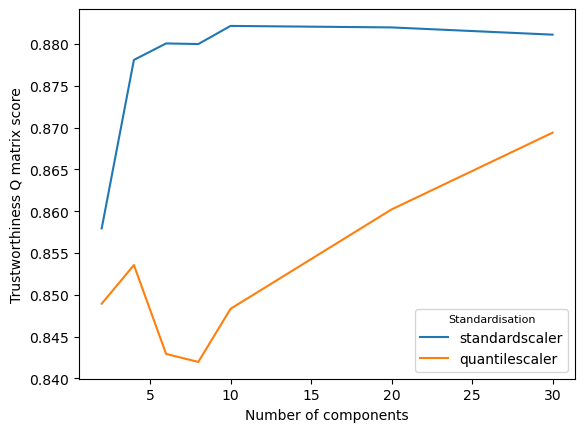

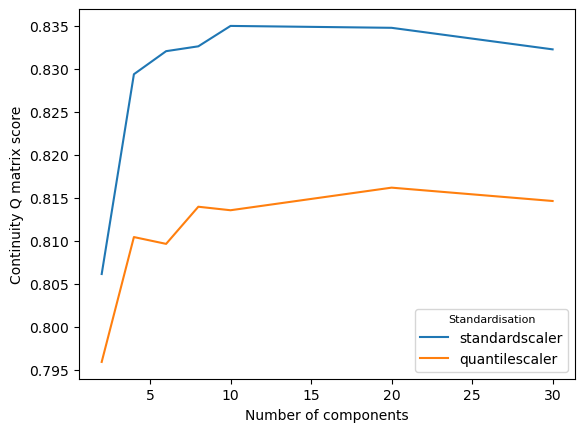

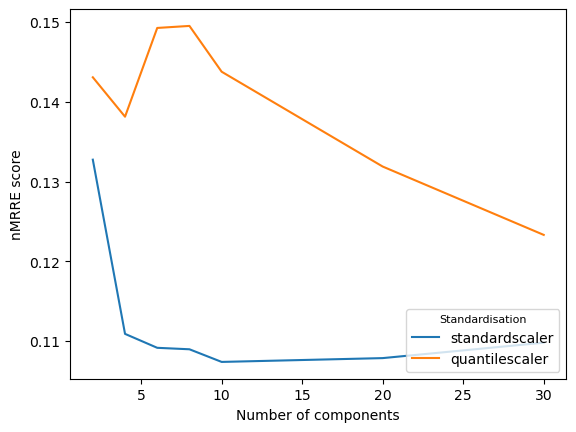

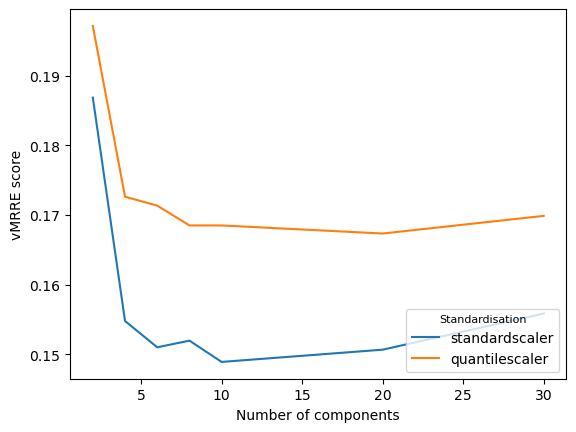

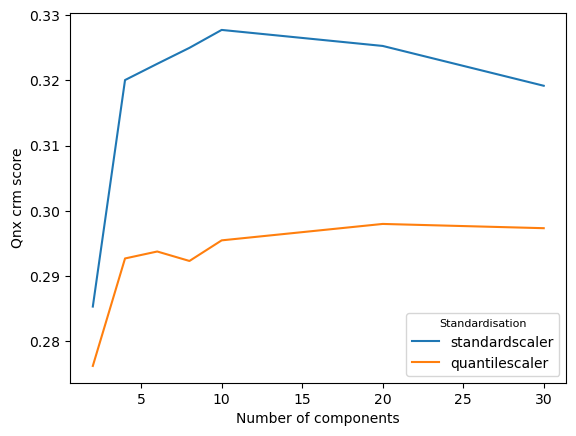

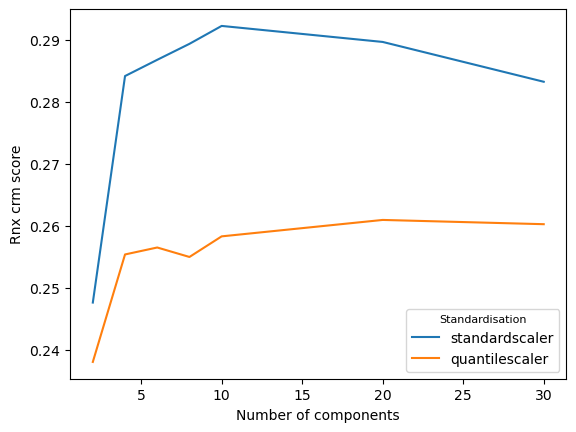

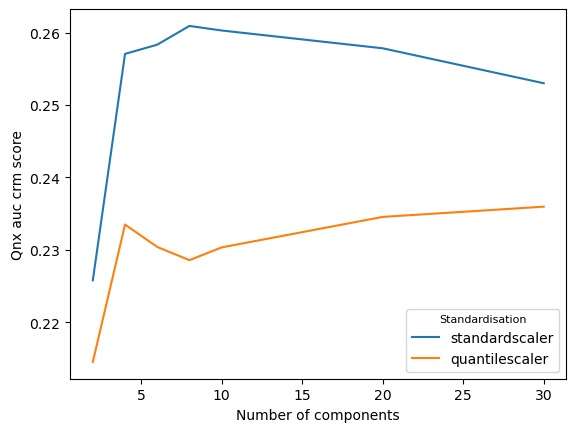

In [7]:
embedder_list = [ umap_std_data[umap_std_data["n_neighbors"]==50],umap_quan_data[umap_quan_data["n_neighbors"]==50]]
hue = ['standardscaler','quantilescaler']
performance_plot_different_files(embedder_list,'n_components','Random_triplets', 'Number of components',"Random triplet score",hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','duration_in_second', 'Number of components','Duration in second',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','neighbor_kept', 'Number of components','Neighbourhood kept ratio score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','dcor_2', 'Number of components','Distance correlation score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','dcor_1', 'Number of components','Data correlation score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Trustworthiness', 'Number of components','Trustworthiness score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','LCMC_Q_matrix', 'Number of components','LCMC score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Trustworthiness_Q_matrix', 'Number of components','Trustworthiness Q matrix score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Continuit_Q_matrix', 'Number of components','Continuity Q matrix score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','nMRRE_Q_matrix', 'Number of components','nMRRE score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','vMRRE_Q_matrix', 'Number of components','vMRRE score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Qnx_crm_Q_matrix', 'Number of components','Qnx crm score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Rnx_crm_Q_matrix', 'Number of components','Rnx crm score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Qnx_auc_crm_Q_matrix', 'Number of components','Qnx auc crm score',hue, "Standardisation")


## Putting it together with 6 components and 15 n_neighbors

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
embedder_full = umap.UMAP(n_components=6,n_neighbors=15,metric = 'manhattan', output_metric= 'manhattan',
                        n_jobs=4, n_epochs=500, init = 'spectral',dens_lambda=0.1, dens_frac=0.1, 
                        repulsion_strength=1.1, negative_sample_rate=10, random_state=42, min_dist=0.0)


le_pipe = Pipeline([('scaler', StandardScaler()),
                    ('embedder', embedder_full)])

le_pipe.fit(cell_dyn.to_numpy(dtype = np.float32))
embedded = pd.DataFrame(le_pipe.named_steps['embedder'].embedding_, columns = ["dim_1","dim_2","dim_3","dim_4","dim_5","dim_6"])
embedded['sex'] = cell_dyn_with_labels.gender
embedded['age'] = cell_dyn_with_labels.age
embedded['study_id'] = cell_dyn_with_labels.studyid_alle_celldyn
embedded['analysis_dt'] = cell_dyn_with_labels.asp_dt
embedded['sample_dt'] = cell_dyn_with_labels.afname_dt
embedded['draw_hour'] = cell_dyn_with_labels.draw_hour
embedded.to_feather("L:/lab_research/RES-Folder-UPOD/Celldynclustering/E_ResearchData/2_ResearchData/cell_dyn_UMAP_embedded_dim_6_MF100.feather")

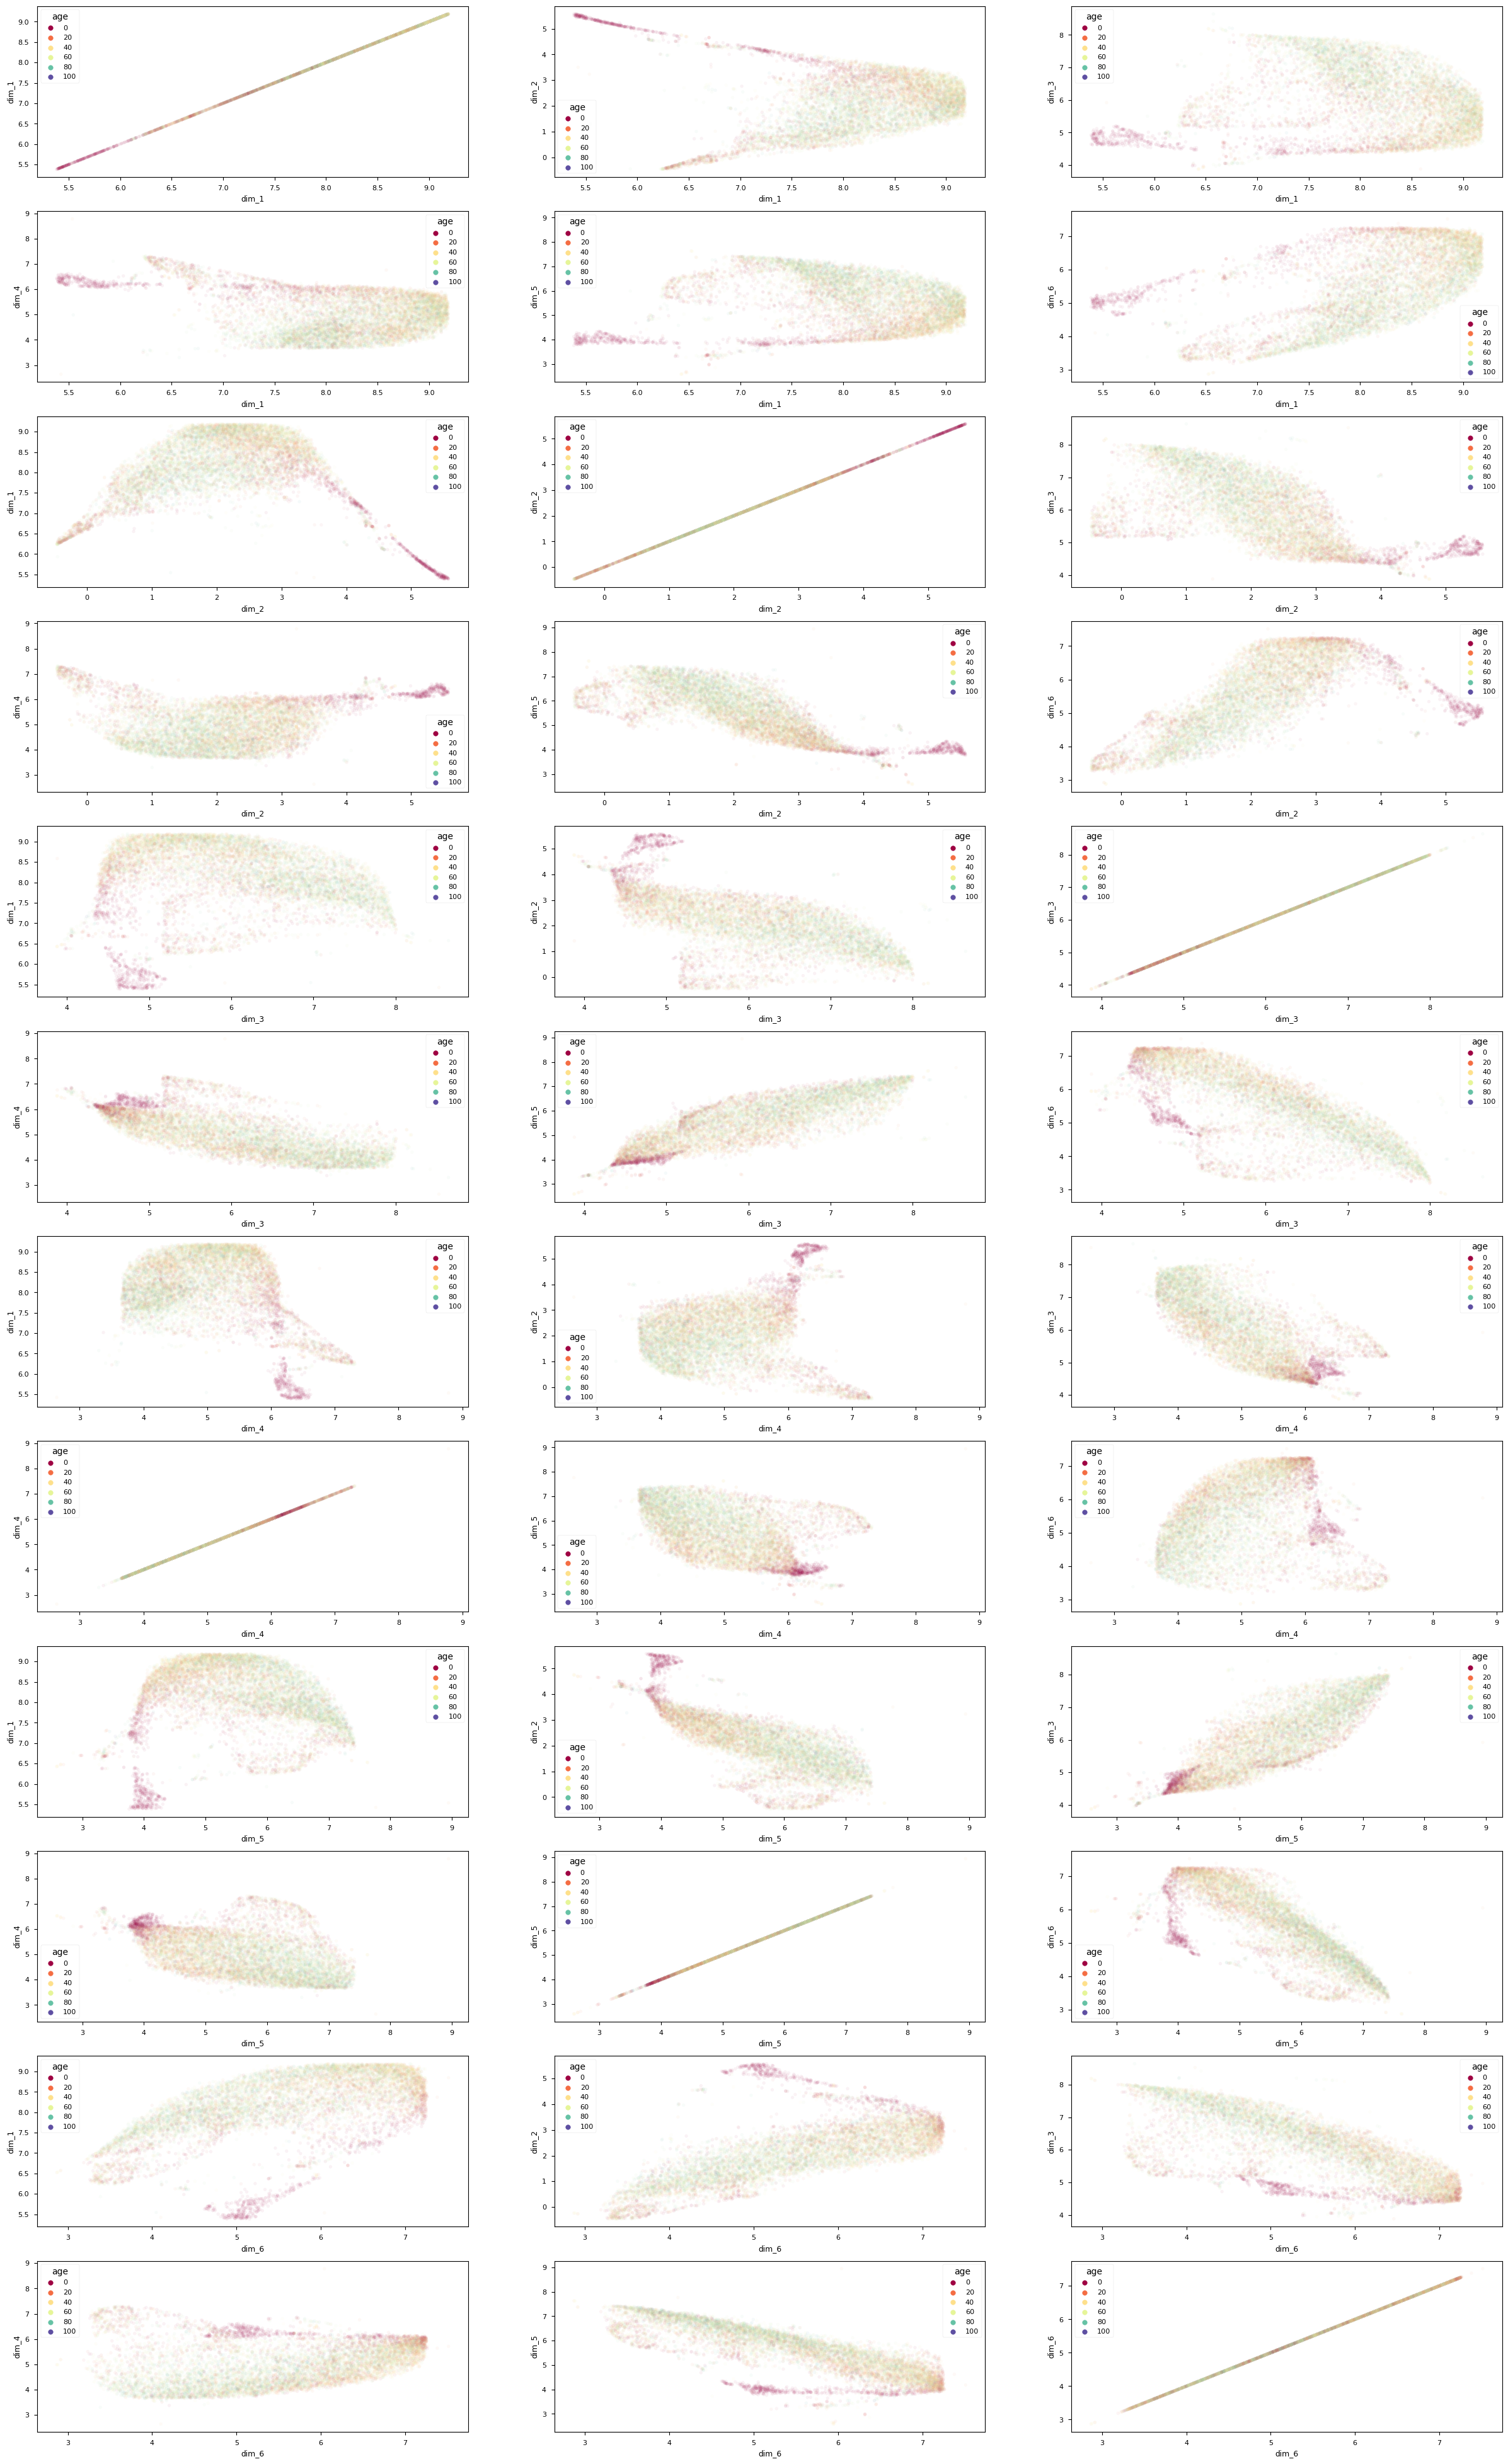

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
if True:
    plt.style.use("seaborn-paper")

    d1q01 = embedded.dim_1.quantile(0.01)
    d1q99 = embedded.dim_1.quantile(0.99)
    d2q01 = embedded.dim_2.quantile(0.01)
    d2q99 = embedded.dim_2.quantile(0.99)

    conds = (embedded.dim_1>d1q01) & (embedded.dim_1<d1q99) & (embedded.dim_2>d2q01) & (embedded.dim_2<d2q99)

    plot_df = embedded.loc[conds].sample(min([10000, sum(conds)]))

    fig, ax = plt.subplots(12,3,figsize = (30,50))
    i,j = 0,0

    #sns.scatterplot(data=plot_df, x='dim_1', y='dim_2',  hue='age', palette="Spectral", s=15, alpha=0.6).set_title("Plotting 1st dimension with the 2nd dimension and looking at pattern of age")
                            #s = 15, alpha = 0.05, palette="Spectral")
    sns.color_palette("vlag", as_cmap=True) # icefire, Spectral
    for colx in plot_df[[c for c in embedded if 'dim' in c]]:
        for coly in plot_df[[c for c in embedded if 'dim' in c]]:
            sns.scatterplot(data=plot_df, x=colx, y=coly,  hue='age',
                            s = 15, alpha = 0.05, ax=ax[i,j], palette="Spectral")
            i = i+1 if j == 2 else i
            j = j+1 if j < 2 else 0
    plt.show()
    #fig.suptitle(model_str)
    #plt.savefig("T:\laupodteam\AIOS\Chontira\CellDynClustering\presentations\images\\age_embedding.png", dpi=300)  

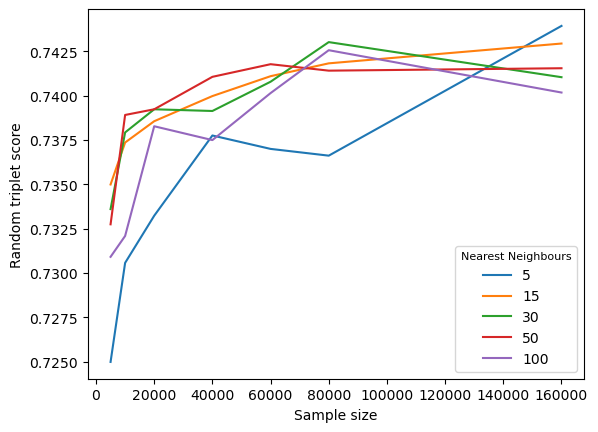

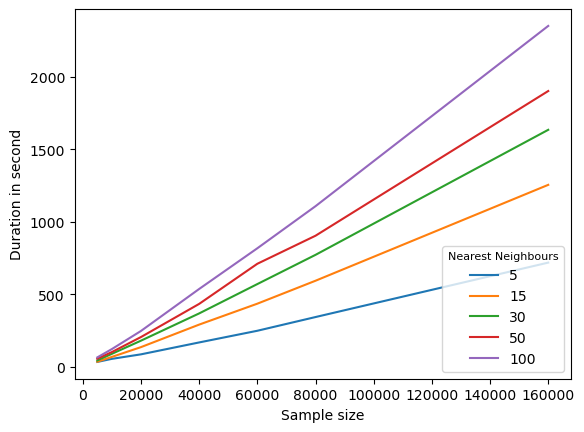

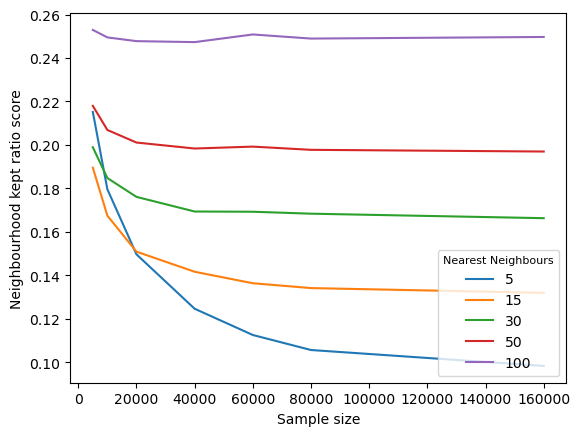

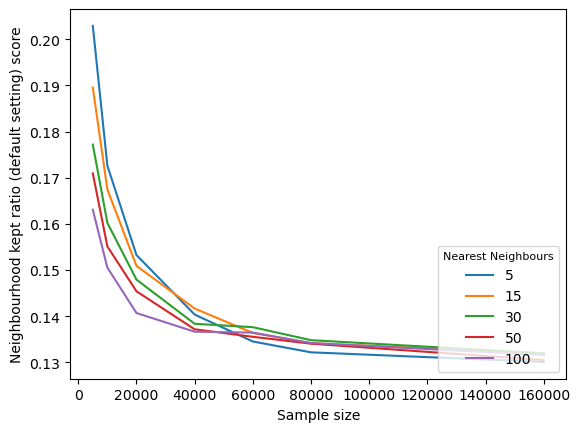

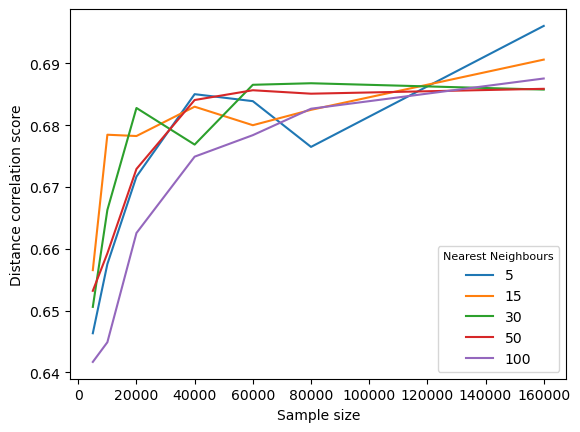

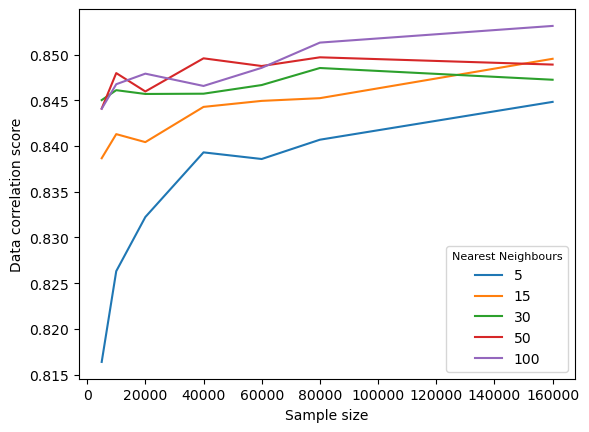

In [3]:
sample_n_n_5 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std.csv")
sample_n_n_15 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std.csv")
sample_n_n_30 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_30_std.csv")
sample_n_n_50 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_50_std.csv")
sample_n_n_100 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_100_std.csv")

sample_ls = [sample_n_n_5,sample_n_n_15, sample_n_n_30, sample_n_n_50,sample_n_n_100]
performance_plot_different_files(sample_ls,'sample_size','Random_triplets', 'Sample size',"Random triplet score",[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','duration_in_second', 'Sample size','Duration in second',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','neighbor_kept_ratio', 'Sample size','Neighbourhood kept ratio score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','neighbor_kept_15', 'Sample size','Neighbourhood kept ratio (default setting) score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','dcor_2', 'Sample size','Distance correlation score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','dcor_1', 'Sample size','Data correlation score',[5,15,30,50,100], "Nearest Neighbours")
